# Abgabe Module Library Carpentry


- Vorname und Name: Melanie Reymer
- Matrikelnummer: 11008482
- Gruppenmitglieder: Jasmin Casarano, Simon Hoffmann, Deborah Platzbecker, Radojka Savic 

## Beschreibung des Datensatzes
Das 'Literature datasets Charlotte Brontë CSV' wurde als ZIP-Datei bei der British Library heruntergeladen. Die Beschreibung des Datensets befindet sich in der Datei  'Readme – Charlotte Bronte.txt', die dem Datenset beigefügt ist. Der Datensatz enthält .csv-Dateien (Comma Separated Value), die Metadaten für Ressourcen enthalten, die sich auf die Autorin C. Brontë beziehen. Der Datensatz beinhaltet fünf Dateien, die je eine andere Datenansicht bieten und jährlich aktualisiert wird. Die Ressourcen entstammen den Sammlungen der British National Bibliography und der British Library. Die rohen bibliografischen Metadaten sind in dem Bibliothekszeichensatzformat MARC8 gespeichert, die CSV-Dateien wurden als UTF-8 exportiert. Durch Änderungen von Katalogisierungsregeln und -verfahren sind Abweichungen bei den Details der einzelnen Einträge entstanden. Zudem stammen die Metadaten in den Tabellen aus unterschiedlichen Quellen, daher sind einige Spalten nicht für alle Datenquellen relevant.

 ## Einlesen des Datensatzes und weitere Vorbereitungen

In [151]:
import pandas as pd
import urllib.request
from zipfile import ZipFile




In [152]:
# Datenset-Bespiel 3

# Literature datasets der British Library zu Charlotte Bronte

# https://www.bl.uk/collection-metadata/downloads


bronte_url = "https://www.bl.uk/bibliographic/downloads/CharlotteBronteResearcherFormat_202204_csv.zip"
# Nimmt den letzten Teil der URL als Dateiname
bronte_file_name = bronte_url.split("/")[-1]



In [153]:
# Lädt die Daten herunter und speicher sie lokal URL muss angegeben werden und eine Datei angeben, wo das ganze abgespeichert wird.
urllib.request.urlretrieve(bronte_url, bronte_file_name)



# Entpacken der Zip-Datei 

with ZipFile(bronte_file_name, 'r') as zip_ref:
    zip_ref.extractall(".")
    
#Anzeigen der enthaltenden Dateien
zip_ref.printdir()
  

File Name                                             Modified             Size
british_library_catalogue_dataset_tc.pdf       2021-01-04 10:28:38       286126
classification.csv                             2022-04-02 09:13:24       441930
names.csv                                      2022-04-02 09:13:24     31736246
Readme - Charlotte Bronte.txt                  2017-11-24 11:39:38         7567
records.csv                                    2022-04-02 09:13:20       818179
titles.csv                                     2022-04-02 09:13:24       913161
topics.csv                                     2022-04-02 09:13:24      3817344


### Bei der oben aufgelisteten Text-Datei und der PDF-Datei handelt es sich nicht um Datensätze, sondern um eine Gebrauchsanweisung british_library_catalogue_dataset_tc.pdf) sowie um eine Beschreibung der Datensätze (Readme - Charlotte Bronte.txt).  



In [154]:
#Mit der Funktion read_csv() werden die als CSV-Datei gespeicherten Daten eingelesen.


bronte_classification = pd.read_csv("classification.csv")
bronte_names = pd.read_csv("names.csv")
bronte_records = pd.read_csv("records.csv")
bronte_titles = pd.read_csv("titles.csv")
bronte_topics = pd.read_csv("topics.csv")
 


In [155]:
# Alle Dateien wurden nach dem Einlesen angesehen und kontrolliert. 
#bronte_classification
bronte_names
#bronte_records
#bronte_titles
#bronte_topics

#Die Datei 'bronte_names' wurde für die weitere Auswertung ausgewählt. Im Folgenden wird der DataFrame für die ausgewählte Datei angezeigt:


,Name,Dates associated with name,Type of name,Role,Other names,BL record ID,Type of resource,Content type,Material type,BNB number,...,Date of creation/publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,Provenance
0,"Abbey, Edwin Austin, RA",NaN,person,author,"Richmond, William Blake, KCB, RA, 1842-1921 [a...",040-001959829,File. Archives and Manuscripts,NaN,NaN,NaN,...,1689-1937,NaN,2 items,NaN,Western Manuscripts. Add MS 54316-54317,"Army of England ; Brontë, Charlotte, author, 1...",NaN,English ; French ; German ; Italian,"Some French, German and Italian . See BMQ, xxx...",NaN
1,"Abe, Tomoji",NaN,person,NaN,"Abe, Tomoji [person] ; Brontë, Charlotte, 1816...",006873592,Monograph,Language material ; Text,Volume,NaN,...,1964,NaN,"487 pages, 20 cm",NaN,JPN.2001.a.185,NaN,NaN,Japanese,出版者は奥付による ; 標題紙・背には河出書房とあり ; 年譜: p484-487,NaN
2,"Abercrombie, Lascelles, poet and literary critic",1881-1938,person,author,"Mundella, Anthony John, PC, MP [author] ; Knel...",040-001964826,File. Archives and Manuscripts,NaN,NaN,NaN,...,c 16th century-20th century,NaN,3 items,NaN,Western Manuscripts. Add MS 70949,"Fry, William Thomas, engraver ; Thomson, James...",NaN,English ; French,CHARNWOOD AUTOGRAPHS. Vol. II. English literar...,|| Some items listed in the catalogue descript...
3,"Adams, Jennifer",1970-,person,author,"Brontë, Charlotte, 1816-1855 [person] ; Adams,...",016009882,Monograph,Language material ; Text,Volume,GBB204145,...,2012,NaN,"1 volume, colour illustrations, 18 cm",813.6,CLE.2012.a.429,Counting--Juvenile literature,Board book ; Children's fiction ; Children's l...,English,Board book,NaN
4,"Adamson, Alan H.",NaN,person,NaN,"Adamson, Alan H. [person]",014530991,Monograph,Language material ; Text,Volume,GBA822766,...,2008,NaN,"xiv, 188 pages, illustrations, 23 cm",823.8,m08/.20181,"Brontë, Charlotte, 1816-1855--Marriage ; Nicho...",Biography,English,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"ʾEʺ Moṅʿ, ūʺ",1905-,person,NaN,"Brontë, Charlotte, 1816-1855 [person] ; ʾEʺ Mo...",008661700,Monograph,Language material ; Text,Volume,NaN,...,1953,NaN,"223 pages, illustrations, 17 cm",NaN,14302.aa.39 (1),English fiction--Translations into Burmese,Translations into Burmese,Burmese,NaN,NaN
2673,"Митрофанова, Екатерина",NaN,person,NaN,"Mitrofanova, Ekaterina, author [person] ; Митр...",014899513,Monograph,Language material ; Text,Volume,NaN,...,2008,"2-е изд, испр. и доп ; 2e izdaniye, ispravlenn...","685 pages, 21 cm",NaN,YF.2011.a.11083,"Brontë, Emily, 1818-1848--Fiction ; Brontë, Pa...",Fiction,Russian,NaN,NaN
2674,"吉田, 健一 (1912-1977)",NaN,person,NaN,"Yoshida, Kenichi [person] ; Brontë, Charlotte,...",006873594,Monograph,Language material ; Text,Volume,NaN,...,1978,NaN,"450 pages, 20 cm",NaN,JPN.2001.a.187,"Brontë, Charlotte, 1816-1855",NaN,Japanese,ブロンテの肖像あり ; 年譜: p447-450 ; 編集: 綜合社 ; 解説: 吉田健一著,NaN
2675,"梨花女子大學校, 英文學科, 英小說班",NaN,organisation,NaN,"梨花女子大學校, 英文學科, 英小說班 [organisation] ; Brontë, C...",017407391,Monograph,Language material ; Text,Volume,NaN,...,1958,NaN,"2 volumes (2), 19 cm",NaN,16584.a.1,NaN,NaN,Korean,Translation of: Jane Eyre,NaN


In [156]:
#Spaltennamen der Tabelle anzeigen lassen

bronte_names.columns

Index(['Name', 'Dates associated with name', 'Type of name', 'Role',
       'Other names', 'BL record ID', 'Type of resource', 'Content type',
       'Material type', 'BNB number', 'Archival Resource Key', 'ISBN', 'Title',
       'Variant titles', 'Series title', 'Number within series',
       'Country of publication', 'Place of publication', 'Publisher',
       'Date of creation/publication', 'Edition', 'Physical description',
       'Dewey classification', 'BL shelfmark', 'Topics', 'Genre', 'Languages',
       'Notes', 'Provenance'],
      dtype='object')

In [157]:
# Anzeige von Spalteninhalten, hier "Date of creation/publication"
bronte_names['Date of creation/publication']

0                         1689-1937
1                              1964
2       c 16th century-20th century
3                              2012
4                              2008
                   ...             
2672                           1953
2673                           2008
2674                           1978
2675                           1958
2676                           1964
Name: Date of creation/publication, Length: 2677, dtype: object

In [158]:
# Anzeige von Spalteninhalten, hier 'Languages'
bronte_names[ 'Languages']

0       English ; French ; German ; Italian
1                                  Japanese
2                          English ; French
3                                   English
4                                   English
                       ...                 
2672                                Burmese
2673                                Russian
2674                               Japanese
2675                                 Korean
2676                               Japanese
Name: Languages, Length: 2677, dtype: object

## Frage und Analyse 1 - In welchen Sprachen steht Literatur zur Verfügung und welche Sprache ist neben Englisch am meisten vertreten?
Im Folgenden soll untersucht werden, welche Sprachen in den Metadaten für die Ressourcen zu Charlotte Brontë angegeben sind. Zu diesem Zweck wird eine Liste der vorkommenden Sprachen erstellt, in der die Sprachen nach Häufigkeit aufgelistet sind. Um zu visualisieren, wie die Häufigkeit der Sprachen verteilt ist, werden die Ergebnisse mittels eines Balkendiagramms grafisch dargestellt.

In [161]:
#Auszählen der Häufigkeit nach Sprachen
bronte_names[ 'Languages'].value_counts()
      

English                                1793
English ; French                        372
English ; French ; German ; Italian     188
French                                   48
German                                   14
Polish                                   11
Russian                                  11
Japanese                                  8
Hungarian                                 8
Spanish                                   7
Dutch                                     6
Italian                                   6
Danish                                    6
Scots                                     5
Korean                                    5
Bengali                                   4
Western Frisian                           4
Portuguese                                4
Swedish                                   4
Lithuanian                                3
English ; Italian                         2
Burmese                                   2
Ukrainian                       

<AxesSubplot:>

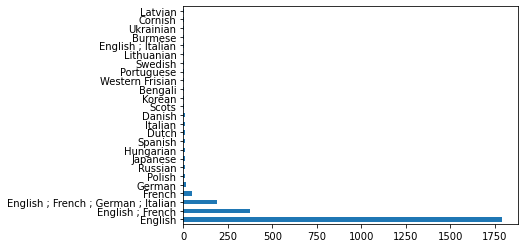

In [162]:
#Darstellung der Häufigkeit als Balkendiagramm
bronte_names['Languages'].value_counts().plot.barh()

## Frage und Analyse 2 - In welchem Erscheinungszeitraum ist die meiste französischsprachige Literatur im DS erschienen oder verfasst worden?
Um herauszufinden, in welchem Zeitraum die meiste französischsprachige Literatur im Datensatz erschienen oder verfasst worden ist, wird zunächst eine Variable gebildet, die nur die französischsprachigen Titel umfasst. Anhand dieser Variable wird die Verteilung der 'Date of creation/publication' in einem Kreisdiagramm visualisiert.

In [163]:
## Anzeige DataFrame französischsprachiger Literatur
bronte_names[bronte_names['Languages'] =='French']

,Name,Dates associated with name,Type of name,Role,Other names,BL record ID,Type of resource,Content type,Material type,BNB number,...,Date of creation/publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,Provenance
93,"Bazin, Claire",NaN,person,NaN,"Bazin, Claire [person]",010792912,Monograph,Language material ; Text,Volume,NaN,...,1995,NaN,225 pages,NaN,YA.1996.a.21060,"Brontë, Emily, 1818-1848 ; English fiction--19...",NaN,French,NaN,NaN
202,"Brontë, Anne",1820-1849,person,NaN,"Brontë, Anne, 1820-1849 [person] ; Brontë, Emi...",014758757,Monograph,Language material ; Text,Volume,NaN,...,2008,NaN,"xxxix, 1723 pages, 18 cm",823.8,YF.2010.a.11485,English literature--Novels--19th century--Crit...,NaN,French,In slip case ; Translated from the English,NaN
246,"Brontë, Anne",1820-1849,person,NaN,"Brontë, Anne, 1820-1849 [person] ; Romey, Char...",000259305,Monograph,Language material ; Text,Volume,NaN,...,1859,NaN,"2 volumes, 18 cm",NaN,12602.d.3,NaN,Fiction,French,"Translations of: Shirley, by Charlotte Brontë,...",NaN
295,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Anne, 1820-1849 [person] ; Brontë, Emi...",014758757,Monograph,Language material ; Text,Volume,NaN,...,2008,NaN,"xxxix, 1723 pages, 18 cm",823.8,YF.2010.a.11485,English literature--Novels--19th century--Crit...,NaN,French,In slip case ; Translated from the English,NaN
339,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Anne, 1820-1849 [person] ; Romey, Char...",000259305,Monograph,Language material ; Text,Volume,NaN,...,1859,NaN,"2 volumes, 18 cm",NaN,12602.d.3,NaN,Fiction,French,"Translations of: Shirley, by Charlotte Brontë,...",NaN
410,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person] ; Loreau...",000259299,Monograph,Language material ; Text,Volume,NaN,...,1858,NaN,"299 pages, 18 cm",NaN,12602.e.3,NaN,Fiction,French,NaN,NaN
413,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person] ; Maurat...",000485663,Monograph,Language material ; Text,Volume,NaN,...,1964,NaN,638 pages (8°),NaN,X.907/530,NaN,NaN,French,Le Livre de poche. number 1175/1177,NaN
415,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person] ; Maurat...",007987986,Monograph,Language material ; Text,Volume,NaN,...,1971,NaN,"3 parts (iv, 134 leaves), 28 cm",NaN,X.902/3607,NaN,NaN,French,NaN,NaN
617,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person]",007996742,Monograph,Language material ; Text,Volume,NaN,...,1979,NaN,21 cm,NaN,X.989/84555,NaN,NaN,French,NaN,NaN
618,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person]",007996743,Monograph,Language material ; Text,Volume,NaN,...,1979,NaN,21 cm,NaN,X.989/84555,Fiction in English--1837-1900--Texts,NaN,French,NaN,NaN


In [164]:
#Neue Variable für französichsprachige Ressourcen in den Metadaten
bronte_names_fr=bronte_names[bronte_names['Languages'] =='French']

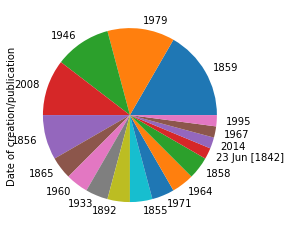

In [165]:
#Visualisierung der Daten in einem Kreisdiagramm
bronte_names_fr['Date of creation/publication'].value_counts().plot.pie()
Label='Date of creation/publication'

## Frage und Analyse 3 -  Welcher Medien-Typ der englischsprachigen Literatur ist prozentual am häufigsten vertreten?
Um die Daten übersichtlich zu gestalten, wird die Tabelle zunächst auf die wichtigen Spalten 'Languages' und 'Typ of resource' eingerenzt. Da es englischsprachige Titel gibt, die nicht als 'English', sondern auch mehrsprachig wie z.B. "English ; French ; German ; Italian" gekennzeichnet sind, soll zur Beantwortung der Frage eine Variable gebildet werden, die alle diese Titel einschließt. Im Weiteren wird eine Häufigkeitsauszählung mittels der neuen Variable vorgenommen. Anhand der Auszählung wird der Prozentanteil des Ressourcen-Typs berechnet und mit einem Kreisdiagramm dargestellt.

In [166]:
#Tabelle eingrenzen auf die Spalten Languages und Type of resource

bronte_resource = bronte_names[['Languages', 'Type of resource']]




In [167]:
bronte_resource


,Languages,Type of resource
0,English ; French ; German ; Italian,File. Archives and Manuscripts
1,Japanese,Monograph
2,English ; French,File. Archives and Manuscripts
3,English,Monograph
4,English,Monograph
...,...,...
2672,Burmese,Monograph
2673,Russian,Monograph
2674,Japanese,Monograph
2675,Korean,Monograph


In [168]:
#Variable für fremdsprachige Literatur, durch schrittweises Einschließen der englischsprachigen und mehrsprachig-englischen Ressourcen
bronte_resource_foreign0=bronte_resource[bronte_resource['Languages'] !='Bengali']
bronte_resource_foreign1=bronte_resource_foreign0[bronte_resource_foreign0['Languages'] !='Burmese']
bronte_resource_foreign2=bronte_resource_foreign1[bronte_resource_foreign1['Languages'] !='Cornish']
bronte_resource_foreign3=bronte_resource_foreign2[bronte_resource_foreign2['Languages'] !='Danish']
bronte_resource_foreign4=bronte_resource_foreign3[bronte_resource_foreign3['Languages'] !='Dutch']
bronte_resource_foreign5=bronte_resource_foreign4[bronte_resource_foreign4['Languages'] !='NaN']
bronte_resource_foreign6=bronte_resource_foreign5[bronte_resource_foreign5['Languages'] !='French']
bronte_resource_foreign7=bronte_resource_foreign6[bronte_resource_foreign6['Languages'] !='German']
bronte_resource_foreign8=bronte_resource_foreign7[bronte_resource_foreign7['Languages'] !='Polish'] 
bronte_resource_foreign9=bronte_resource_foreign8[bronte_resource_foreign8['Languages'] !='Russian']
bronte_resource_foreign10=bronte_resource_foreign9[bronte_resource_foreign9['Languages'] !='Japanese']
bronte_resource_foreign11=bronte_resource_foreign10[bronte_resource_foreign10['Languages'] !='Spanish']
bronte_resource_foreign12=bronte_resource_foreign11[bronte_resource_foreign11['Languages'] !='Italian']
bronte_resource_foreign13=bronte_resource_foreign12[bronte_resource_foreign12['Languages'] !='Scots']
bronte_resource_foreign14=bronte_resource_foreign13[bronte_resource_foreign13['Languages'] !='Korean']
bronte_resource_foreign15=bronte_resource_foreign14[bronte_resource_foreign14['Languages'] !='Western Frisian']
bronte_resource_foreign16=bronte_resource_foreign15[bronte_resource_foreign15['Languages'] !='Portuguese']                 
bronte_resource_foreign17=bronte_resource_foreign16[bronte_resource_foreign16['Languages'] !='Swedish']
bronte_resource_foreign18=bronte_resource_foreign17[bronte_resource_foreign17['Languages'] !='Lithuanian']                       
bronte_resource_foreign19=bronte_resource_foreign18[bronte_resource_foreign18['Languages'] !='Ukrainian']
bronte_resource_english=bronte_resource_foreign19[bronte_resource_foreign19['Languages'] !='Latvia']                                        

#Anzeige der bereinigten Tabelle
bronte_resource_english



,Languages,Type of resource
0,English ; French ; German ; Italian,File. Archives and Manuscripts
2,English ; French,File. Archives and Manuscripts
3,English,Monograph
4,English,Monograph
5,English ; French,File. Archives and Manuscripts
...,...,...
2664,English ; French ; German ; Italian,File. Archives and Manuscripts
2665,English ; French,File. Archives and Manuscripts
2667,English,Monograph
2668,English,Monograph


Es fällt auf, dass 'NaN' unter den Sprachen aufgeführt wird, obwohl es zuvor ausgeschlossen worden ist.

In [169]:
##Verteilung nach 'Type of resource' für die englischsprachige Literatur 
bronte_resource_english[ 'Type of resource'].value_counts()


Monograph                           1932
File. Archives and Manuscripts       576
Fonds. Archives and Manuscripts        8
Serial                                 3
Series. Archives and Manuscripts       3
Monographic component part             2
Item. Photographs                      1
Name: Type of resource, dtype: int64

In [170]:
# Ermöglichen der grafischen Darstellung mit der Matplot Library
import matplotlib.pyplot as plt

In [171]:
# Berechnen der Prozentanteile nach 'Type of resource'

Gesamt=(1932+576+8+3+3+2+1)
Monograph=(1932/Gesamt*100)
File=(576/Gesamt*100)
Others=((8+3+3+2+1)/Gesamt*100) #Zusammenfassung der Daten, da die Visualisierung unübersichtlich wird

print(Gesamt)
print(Monograph)
print(File)
print(Others)


2525
76.51485148514851
22.811881188118814
0.6732673267326733


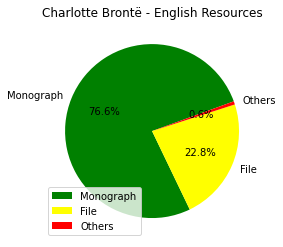

In [172]:
#Runden auf 1 Nachkommastelle:
#Gesamt: 2525
#Monograph: 76.5
#File: 22.8
#Others: 0.6



# Erstellen eines Piecharts der Prozentanteile inkl. Beschriftung und Legende
labels = 'Monograph', 'File', 'Others'
values = [76.5, 22.8, 0.6]
colors = ['green', 'yellow', 'red']

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=20, colors=colors)


plt.title('Charlotte Brontë - English Resources')
plt.legend(labels,loc=3)
plt.show()


## Diskussion 


Aus den entpackten Datensets wurde für die Analyse das Datenset 'names.csv' ausgewählt. Da der Datensatz lediglich aus 2677Reihen und 29 Spalten besteht, wurde keine Begrenzung der Einträge vorgenommen.

Ergebnis Frage 1: 
Das Balkendiagramm zeigt, dass die meisten Ressourcen in englischer Sprache, aber auch mehrsprachig vorliegen 
(z. B. Englisch/ Französisch) vorliegen. Neben diesen englischsprachigen und mehrsprachigen Titeln ist die französische Sprache am häufigsten vertreten. In der Tabelle wird angezeigt, dass Französisch als Sprache der Ressourcen 48 Mal aufgeführt ist. Im Balkendiagramm wird das Ergebnis zusätzlich grafisch dargestellt. 

Ergebnis Frage 2:
Das Diagramm zeigt, dass die meisten französischsprachigen Ressourcen zu Charlotte Brontë in dem Jahr 1859 veröffentlicht oder verfasst worden sind.

Ergebnis Frage 3: Mit 76,6 Prozent sind die meisten englischsprachigen Ressourcen im vorliegenden Datensatz Monografien. Der Typ 'File. Archives and Manuscripts' ist mit 22,8 Prozent vertreten. Da die weiteren Ressourcen-Typen aufgrund ihres geringen Vorkommens im Pie-Chart nicht einzeln dargestellt werden können, wurden diese Typen zu 'Others' zusammengefasst. Sie machen lediglich 0,6 Prozent der verzeichneten Ressourcen aus. Das Diagramm ist jedoch nicht ganz genau, da es nicht gelungen ist, die Titel, deren Sprache als 'NaN' gekennzeichnet ist, in der neuen Variable auszuschließen. Zudem ist es nicht gelungen, eine Variable in einem Schritt zu bilden, in der 'English' sowie mehrsprachig/Englisch herausgefiltert werden.